In [1]:
import nibabel as nib

In [56]:
t1w_pth = "Output/sourcedata/freesurfer/sub-001/mri/orig.mgz"
t1w_data = nib.load(t1w_pth).get_fdata()

In [57]:
t1w_data.shape

(256, 256, 256)

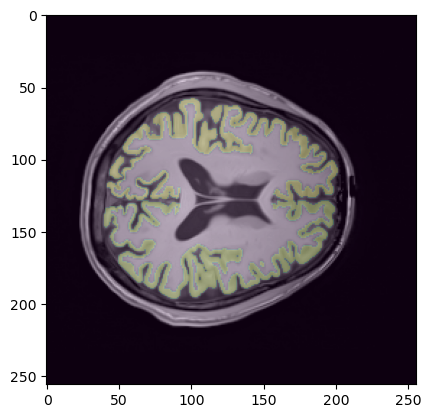

In [58]:
import matplotlib.pyplot as plt

plt.imshow(t1w_data[:,100,:], cmap="gray")
plt.imshow(parc_data[:,100,:], alpha=0.2)

In [3]:
nifti_pth = "Output/sub-001/func/sub-001_task-Training_run-12_space-T1w_desc-preproc_bold.nii.gz"

In [108]:
fmri = nib.load(nifti_pth)
fmri_data = fmri.get_fdata()
parc = nib.load("Output/aparc.a2009s-epi01.nii.gz")
parc_data = parc.get_fdata()

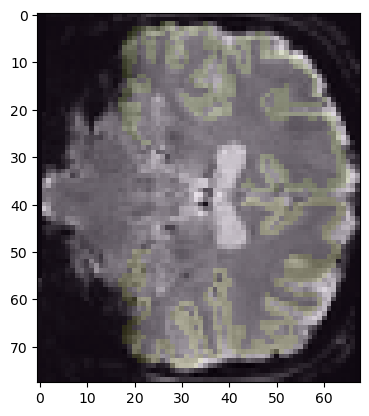

In [109]:
plt.imshow(fmri_data[:, 40,:, 0], cmap="gray")
plt.imshow(parc_data[:,40,:], alpha=0.1)

In [129]:
fmri = {}
for x in range(len(parc_data)):
    for y in range(len(parc_data[0])):
        for z in range(len(parc_data[0][0])):
            label_idx = int(parc_data[x][y][z])
            if label_idx > 11000 and label_idx < 20000: # choose cortical voxels only
                voxel_ts = list(fmri_data[x][y][z])
                if label_idx not in fmri:
                    fmri[label_idx] = [voxel_ts]
                else:
                    fmri[label_idx].append(voxel_ts)

In [139]:
for key, val in fmri.items():
    fmri[key] = np.array(val)

In [149]:
meta = nifti_pth.split("/")[-1].replace("_", "-").split("-")
data_dict = {}
data_dict["sub"] = meta[1]
data_dict["task"] = meta[3]
data_dict["run"] = meta[5]
data_dict["space"] = meta[7]
data_dict["fmri"] = fmri 

In [155]:
"_".join(meta[:-3]) + "_fmri.pkl"

'sub_001_task_Training_run_12_space_T1w_fmri.pkl'

In [158]:
import pickle

fname = "_".join(meta[:-3]) + "_fmri.pkl"
pickle.dump(data_dict, open(fname, "wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [159]:
loaded_fmri = pickle.load(open(fname, "rb"))

In [160]:
loaded_fmri

{'sub': '001',
 'task': 'Training',
 'run': '12',
 'space': 'T1w',
 'fmri': {11138: array([[455.49801636, 508.30081177, 456.53924561, ..., 428.9548645 ,
          435.33670044, 399.2668457 ],
         [529.26727295, 537.29711914, 540.58227539, ..., 532.64227295,
          523.60021973, 533.35412598],
         [639.85015869, 657.46313477, 649.94512939, ..., 640.30914307,
          656.16912842, 636.28210449],
         ...,
         [394.5769043 , 407.84909058, 400.09823608, ..., 407.43405151,
          401.72344971, 413.17358398],
         [415.6494751 , 381.39108276, 394.19067383, ..., 420.95721436,
          408.53842163, 437.78173828],
         [392.675354  , 407.9196167 , 421.99481201, ..., 378.21575928,
          379.34051514, 375.0397644 ]]),
  11134: array([[470.64077759, 480.25650024, 469.0177002 , ..., 489.50726318,
          471.83358765, 455.18234253],
         [453.41479492, 450.98727417, 444.34127808, ..., 451.86407471,
          446.24813843, 462.75354004],
         [405.0

In [110]:
labels = ["G_and_S_frontomargin","G_and_S_occipital_inf","G_and_S_paracentral","G_and_S_subcentral","G_and_S_transv_frontopol",
          "G_and_S_cingul-Ant","G_and_S_cingul-Mid-Ant","G_and_S_cingul-Mid-Post","G_cingul-Post-dorsal","G_cingul-Post-ventral",
          "G_cuneus","G_front_inf-Opercular","G_front_inf-Orbital","G_front_inf-Triangul","G_front_middle","G_front_sup","G_Ins_lg_and_S_cent_ins",
          "G_insular_short","G_occipital_middle","G_occipital_sup","G_oc-temp_lat-fusifor","G_oc-temp_med-Lingual","G_oc-temp_med-Parahip","G_orbital",
          "G_pariet_inf-Angular","G_pariet_inf-Supramar","G_parietal_sup","G_postcentral","G_precentral","G_precuneus","G_rectus","G_subcallosal",
          "G_temp_sup-G_T_transv","G_temp_sup-Lateral","G_temp_sup-Plan_polar","G_temp_sup-Plan_tempo","G_temporal_inf","G_temporal_middle",
          "Lat_Fis-ant-Horizont","Lat_Fis-ant-Vertical","Lat_Fis-post","Medial_wall","Pole_occipital","Pole_temporal","S_calcarine",
          "S_central","S_cingul-Marginalis","S_circular_insula_ant","S_circular_insula_inf","S_circular_insula_sup","S_collat_transv_ant",
          "S_collat_transv_post","S_front_inf","S_front_middle","S_front_sup","S_interm_prim-Jensen","S_intrapariet_and_P_trans",
          "S_oc_middle_and_Lunatus","S_oc_sup_and_transversal","S_occipital_ant","S_oc-temp_lat","S_oc-temp_med_and_Lingual","S_orbital_lateral",
          "S_orbital_med-olfact","S_orbital-H_Shaped","S_parieto_occipital","S_pericallosal","S_postcentral","S_precentral-inf-part",
          "S_precentral-sup-part","S_suborbital","S_subparietal","S_temporal_inf","S_temporal_sup","S_temporal_transverse"]

In [113]:
label_map = {}
for s, hemi in [(11100, "lh"), (12100,"rh")]:
    for i, label in enumerate(labels):
        label_map[s+i+1] =  hemi + "_" + 

150

In [120]:
all_labels = list(np.unique(parc_data))
parc_labels = []
for label in all_labels:
    if label >= 11000 and label < 12000:
        parc_labels.append(int(label))

In [123]:
parc_labels

[11101,
 11102,
 11103,
 11104,
 11105,
 11106,
 11107,
 11108,
 11109,
 11110,
 11111,
 11112,
 11113,
 11114,
 11115,
 11116,
 11117,
 11118,
 11119,
 11120,
 11121,
 11122,
 11123,
 11124,
 11125,
 11126,
 11127,
 11128,
 11129,
 11130,
 11131,
 11132,
 11133,
 11134,
 11135,
 11136,
 11137,
 11138,
 11139,
 11140,
 11141,
 11143,
 11144,
 11145,
 11146,
 11147,
 11148,
 11149,
 11150,
 11151,
 11152,
 11153,
 11154,
 11155,
 11156,
 11157,
 11158,
 11159,
 11160,
 11161,
 11162,
 11163,
 11164,
 11165,
 11166,
 11167,
 11168,
 11169,
 11170,
 11171,
 11172,
 11173,
 11174,
 11175]